In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
from citipy import citipy

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

KeyboardInterrupt: 

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 7 | cherskiy
Processing Record 2 of Set 7 | port alfred
Processing Record 3 of Set 7 | suntar
Processing Record 4 of Set 7 | shancheng
Processing Record 5 of Set 7 | dolores
Processing Record 6 of Set 7 | sistranda
Processing Record 7 of Set 7 | kapaa
Processing Record 8 of Set 7 | mataura
Processing Record 9 of Set 7 | butaritari
Processing Record 10 of Set 7 | russell
Processing Record 11 of Set 7 | rikitea
Processing Record 12 of Set 7 | zaranj
Processing Record 13 of Set 7 | axim
Processing Record 14 of Set 7 | benguela
Processing Record 15 of Set 7 | tucuman
Processing Record 16 of Set 7 | sigli
Processing Record 17 of Set 7 | kimberley
Processing Record 18 of Set 7 | punta arenas
Processing Record 19 of Set 7 | castro
Processing Record 20 of Set 7 | ushuaia
Processing Record 21 of Set 7 | cidreira
Processing Record 22 of Set 7 | ocos
Processing Record 23 of Set 7 | bredasdorp
Processing Record 24 of Set 7 | mar del plata
Processing Record 25 of Set 7 | 

Processing Record 38 of Set 10 | pomabamba
Processing Record 39 of Set 10 | te anau
Processing Record 40 of Set 10 | saint-philippe
Processing Record 41 of Set 10 | rolim de moura
City not found. Skipping...
Processing Record 42 of Set 10 | munster
Processing Record 43 of Set 10 | seoul
Processing Record 44 of Set 10 | san patricio
Processing Record 45 of Set 10 | georgetown
Processing Record 46 of Set 10 | morondava
Processing Record 47 of Set 10 | yinchuan
Processing Record 48 of Set 10 | grand forks
Processing Record 49 of Set 10 | olafsvik
Processing Record 50 of Set 10 | severo-kurilsk
Processing Record 1 of Set 11 | naze
Processing Record 2 of Set 11 | rodrigues alves
Processing Record 3 of Set 11 | bur gabo
City not found. Skipping...
Processing Record 4 of Set 11 | bilma
Processing Record 5 of Set 11 | hasaki
Processing Record 6 of Set 11 | praia
Processing Record 7 of Set 11 | alta floresta
Processing Record 8 of Set 11 | banes
Processing Record 9 of Set 11 | harnosand
Process

Processing Record 22 of Set 14 | kungalv
Processing Record 23 of Set 14 | bubaque
Processing Record 24 of Set 14 | nagua
Processing Record 25 of Set 14 | antalaha
Processing Record 26 of Set 14 | skjervoy
Processing Record 27 of Set 14 | suluq
Processing Record 28 of Set 14 | itoman
Processing Record 29 of Set 14 | rutana
Processing Record 30 of Set 14 | rotterdam
Processing Record 31 of Set 14 | bara
Processing Record 32 of Set 14 | esperance
Processing Record 33 of Set 14 | kalininsk
Processing Record 34 of Set 14 | poronaysk
Processing Record 35 of Set 14 | nago
Processing Record 36 of Set 14 | poole
Processing Record 37 of Set 14 | paracatu
Processing Record 38 of Set 14 | the valley
Processing Record 39 of Set 14 | plettenberg bay
Processing Record 40 of Set 14 | tonstad
Processing Record 41 of Set 14 | aflu
City not found. Skipping...
Processing Record 42 of Set 14 | lushunkou
City not found. Skipping...
Processing Record 43 of Set 14 | samusu
City not found. Skipping...
Processi

Processing Record 8 of Set 18 | linxia
Processing Record 9 of Set 18 | port keats
Processing Record 10 of Set 18 | rosetta
Processing Record 11 of Set 18 | corinto
Processing Record 12 of Set 18 | cabedelo
Processing Record 13 of Set 18 | valle nacional
Processing Record 14 of Set 18 | caohe
Processing Record 15 of Set 18 | velke karlovice
Processing Record 16 of Set 18 | lobatse
Processing Record 17 of Set 18 | sechura
Processing Record 18 of Set 18 | vila velha
Processing Record 19 of Set 18 | cayenne
Processing Record 20 of Set 18 | copperas cove
Processing Record 21 of Set 18 | amalapuram
Processing Record 22 of Set 18 | jizan
Processing Record 23 of Set 18 | grand centre
City not found. Skipping...
Processing Record 24 of Set 18 | ashibetsu
Processing Record 25 of Set 18 | kembe
Processing Record 26 of Set 18 | kerteh
City not found. Skipping...
Processing Record 27 of Set 18 | raudeberg
Processing Record 28 of Set 18 | kongolo
Processing Record 29 of Set 18 | kabanjahe
Processing

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,73.78,34,95,11.39,RU,2022-07-11 23:13:14
1,Port Alfred,-33.5906,26.8910,57.36,81,0,9.08,ZA,2022-07-11 23:13:15
2,Suntar,62.1444,117.6319,65.97,68,74,4.97,RU,2022-07-11 23:13:15
3,Shancheng,34.7953,116.0817,82.06,90,98,7.09,CN,2022-07-11 23:13:15
4,Dolores,-36.3132,-57.6792,46.63,69,100,13.78,AR,2022-07-11 23:13:16
5,Sistranda,63.7256,8.8340,57.16,82,97,5.10,NO,2022-07-11 23:13:16
6,Kapaa,22.0752,-159.3190,84.52,71,75,13.80,US,2022-07-11 23:13:16
7,Mataura,-46.1927,168.8643,44.47,89,100,11.36,NZ,2022-07-11 23:13:17
8,Butaritari,3.0707,172.7902,81.93,80,100,17.54,KI,2022-07-11 23:13:17
9,Russell,32.3502,-85.1999,83.97,74,75,6.91,US,2022-07-11 23:13:17


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-07-11 23:13:14,68.7500,161.3000,73.78,34,95,11.39
1,Port Alfred,ZA,2022-07-11 23:13:15,-33.5906,26.8910,57.36,81,0,9.08
2,Suntar,RU,2022-07-11 23:13:15,62.1444,117.6319,65.97,68,74,4.97
3,Shancheng,CN,2022-07-11 23:13:15,34.7953,116.0817,82.06,90,98,7.09
4,Dolores,AR,2022-07-11 23:13:16,-36.3132,-57.6792,46.63,69,100,13.78
...,...,...,...,...,...,...,...,...,...
567,Spassk-Ryazanskiy,RU,2022-07-11 23:28:15,54.4072,40.3806,66.43,83,100,12.41
568,Miyang,CN,2022-07-11 23:28:15,24.4042,103.4428,66.40,99,61,2.21
569,Langarud,IR,2022-07-11 23:28:15,37.1970,50.1535,75.25,68,0,5.77
570,Berlevag,NO,2022-07-11 23:28:16,70.8578,29.0864,50.00,100,100,5.75


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

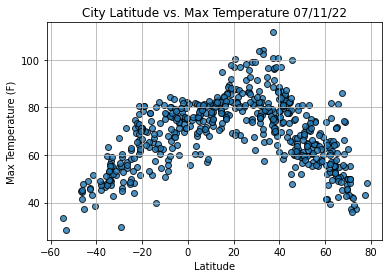

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

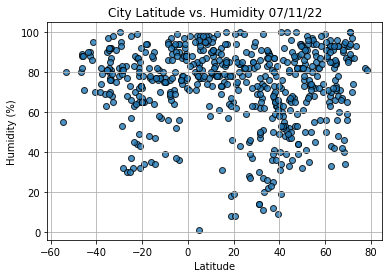

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

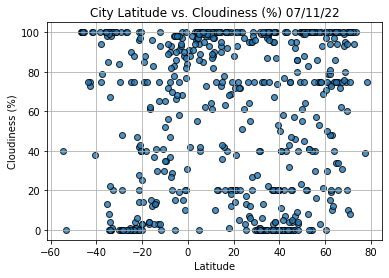

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

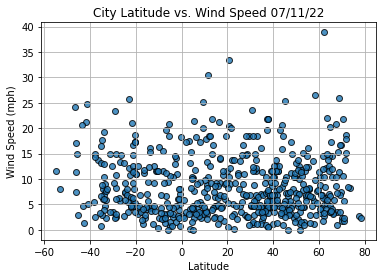

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()